In [6]:
library(ggplot2)
library(dplyr)
library(knitr)
options(warn=-1)

## Examples in Ggplot2

#### Example 1.

In [4]:
options(repr.plot.width=12,repr.plot.height=7) # set size of the figure

In [5]:
df.exmp <- readRDS(file="./Data/FEV1_decline.rds")

In [8]:
kable(df.exmp,"rst")



=======  =======  =======  ============  ==========
cluster  yearGap  smoking  mean_decline  sd_decline
=======  =======  =======  ============  ==========
1              0        0      0.000000      0.0000
1              1        0    -38.738525    194.1567
1              2        0    -79.997297    211.1909
1              3        0   -100.515789    231.7574
2              0        0      0.000000      0.0000
2              1        0    -86.408088    189.1897
2              2        0   -126.909449    201.2613
2              3        0   -145.972727    197.5125
3              0        0      0.000000      0.0000
3              1        0      3.934667    234.0076
3              2        0    -46.260606    250.9588
3              3        0   -113.437500    265.2953
4              0        0      0.000000      0.0000
4              1        0    -31.118657    126.7462
4              2        0    -56.395727    152.3740
4              3        0    -84.457303    166.0400
=======  =

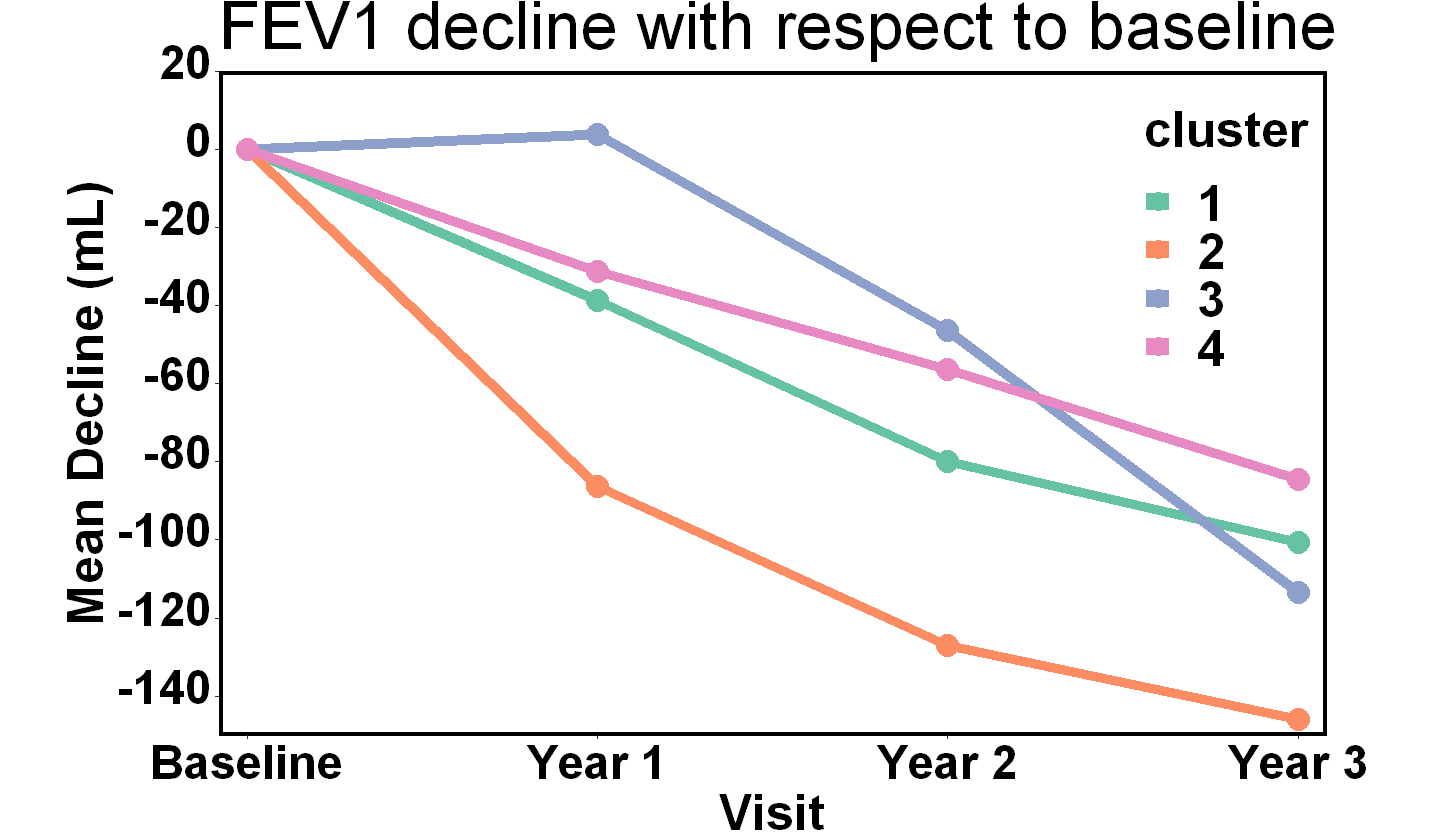

In [10]:
df.exmp %>% ggplot(aes(x=yearGap,y=mean_decline,color=cluster,group=cluster)) + 
                            geom_line(aes(shape=cluster),size=3)+ # set up line layer
                            geom_point(size=6)+  # setup point layer
                           # geom_errorbar(aes(ymin=mean_decline-sd_decline,ymax=mean_decline+sd_decline))+
                            scale_color_brewer(palette = "Set2")+ #set discrete palette
                            scale_y_continuous(limits=c(-150,20),breaks=seq(20,-150,-20),expand=c(0,0))+ # set up the axis 
                            scale_x_continuous(limits=c(0,3),breaks=c(0,1,2,3),expand=c(0,0.08),labels = c("Baseline","Year 1","Year 2","Year 3"))+
                            xlab("Visit") + ylab("Mean Decline (mL)")+ggtitle("FEV1 decline with respect to baseline")+ # set up the titles
                            theme_bw() +
                            theme(aspect.ratio = 0.6,   ## set the figure aspect ratio
                                        plot.title=element_text(size=40), # set up the figure title size
                                        axis.title=element_text(face="bold",size = 30), # set up the axis title size
                                        axis.text=element_text(size=28,face="bold",color = "black",vjust = 0.2), # set up the axis text size
                                        legend.title = element_text(face = "bold",size =30,hjust = 0.1),  # set up the legend title size
                                        legend.text =element_text(face="bold",size=30), # set up the legend text size
                                        #legend.title.align = 1, # 
                                        legend.position = c(0.91,0.75), # set up the legend position
                                        #legend.justification = c("right","top"), # set up the anchor point for legend
                                        legend.background=element_blank(),
                                        #legend.box.background=element_rect(color="black"),
                                        panel.grid=element_blank(),
                                        #panel.grid=element_line(color="black"),
                                        panel.border=element_rect(color="black",size=2),  # set panel border
                                        plot.margin=unit(c(0,0.4,0,0),"inch"))+  #margin(t, r, l, b) # set plot margin
                            guides(shape=guide_legend(override.aes = list(size =5))) # override the legend size